In [ ]:
#K-Medoids untuk mengetahui kecepatan rata-rata per hari dan waktu rata-rata per hari (Go Track)

In [ ]:
#meng-import library yang diperlukan
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples,silhouette_score

     \ 1.7MB 6.6MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=1273318 sha256=7680d95cedc250560ab324cadcc4314263ee9fe4e9e7673b6958a50cd932affb
  Stored in directory: /tmp/pip-ephem-wheel-cache-ya5yh1ub/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built scikit-learn-extra


In [ ]:
#untuk upload file dataset
#upload dilakukan secara manual
from google.colab import files
uploaded =files.upload()

driver = pd.read_csv('go_track_tracks.csv')

Saving go_track_tracks.csv to go_track_tracks.csv


In [ ]:
#menampilkan tabel dataset
driver.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [ ]:
#menghilangkan kolom yang tidak perlu dari tabel dataset
driver = driver.drop(["linha", "car_or_bus","rating_weather", "rating_bus","rating", "distance"], axis = 1)
driver.head()

,id,id_android,speed,time
0,1,0,19.210586,0.138049
1,2,0,30.848229,0.171485
2,3,1,13.560101,0.067699
3,4,1,19.766679,0.389544
4,8,0,25.807401,0.154801


In [ ]:
#memilih kolom yang ingin digunakan
driver_x = driver.iloc[:, 2:4]
driver_x.head()

,speed,time
0,19.210586,0.138049
1,30.848229,0.171485
2,13.560101,0.067699
3,19.766679,0.389544
4,25.807401,0.154801


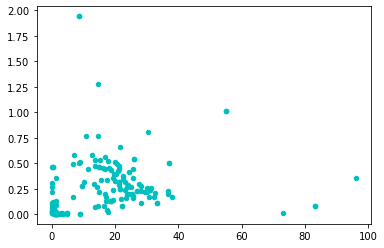

In [ ]:
plt.scatter(driver.speed, driver.time, s =20, c = "c", marker = "o", alpha = 1) #s=Size
plt.show()

In [ ]:
x_array =  np.array(driver_x)
print(x_array)

[[1.92105856e+01 1.38048889e-01]
 [3.08482291e+01 1.71484722e-01]
 [1.35601009e+01 6.76986111e-02]
 [1.97666790e+01 3.89544444e-01]
 [2.58074009e+01 1.54800556e-01]
 [1.34691332e+00 6.68194444e-03]
 [3.68507874e+01 2.28000556e-01]
 [1.74051313e+01 3.87816667e-02]
 [1.53954361e+01 5.26844444e-01]
 [8.90272944e+00 3.03277778e-03]
 [1.50413480e+01 2.17866111e-01]
 [1.44400981e+01 2.68142222e-01]
 [1.63567325e+01 7.70325000e-02]
 [1.75427999e+01 3.33869167e-01]
 [9.45181557e+00 2.76772222e-01]
 [9.45181557e+00 2.76772222e-01]
 [1.62635039e+01 4.50948333e-01]
 [2.12235944e+01 2.89724722e-01]
 [1.94236545e+01 2.36567222e-01]
 [2.07996291e+01 4.25440278e-01]
 [8.72437242e+00 1.94294778e+00]
 [8.72437242e+00 1.94294778e+00]
 [8.68613764e+00 5.02409722e-01]
 [5.49959473e+01 1.01407472e+00]
 [5.49959473e+01 1.01407472e+00]
 [1.26110448e+01 5.79095556e-01]
 [1.45342872e+01 7.90544444e-02]
 [1.02882267e+01 3.18422222e-01]
 [1.83281891e+01 1.30945833e-01]
 [1.71776350e+01 1.66088056e-01]
 [1.709782

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.99600362e-01, 7.00101993e-02],
       [3.20578504e-01, 8.72383023e-02],
       [1.40861225e-01, 3.37616087e-02],
       [2.05381184e-01, 1.99595465e-01],
       [2.68176999e-01, 7.86416407e-02],
       [1.39000630e-02, 2.32224220e-03],
       [3.82977592e-01, 1.16358575e-01],
       [1.80831914e-01, 1.88619024e-02],
       [1.59940297e-01, 2.70340480e-01],
       [9.24459124e-02, 4.41977437e-04],
       [1.56259404e-01, 1.11136715e-01],
       [1.50009162e-01, 1.37041917e-01],
       [1.69933373e-01, 3.85709759e-02],
       [1.82263037e-01, 1.70908295e-01],
       [9.81538910e-02, 1.41488599e-01],
       [9.81538910e-02, 1.41488599e-01],
       [1.68964223e-01, 2.31234351e-01],
       [2.20526426e-01, 1.48162487e-01],
       [2.01815302e-01, 1.20772625e-01],
       [2.16119130e-01, 2.18091104e-01],
       [9.05918170e-02, 1.00000000e+00],
       [9.05918170e-02, 1.00000000e+00],
       [9.01943506e-02, 2.57750278e-01],
       [5.71604072e-01, 5.21390105e-01],
       [5.716040

In [ ]:
#Menentukan dan mengkonfigurasi fungsi kmedoids
kmedoids = KMedoids(n_clusters = 3, random_state=123456).fit(x_scaled) #Menentukan kluster dari data

In [ ]:
#menampilkan pusat kluster
print(kmedoids.cluster_centers_)

[[0.01353309 0.00712903]
 [0.16896422 0.23123435]
 [0.26447552 0.09882819]]


In [ ]:
#Menambahkan Kolom "kluster" Dalam Data Frame Driver
driver['kluster'] = kmedoids.labels_

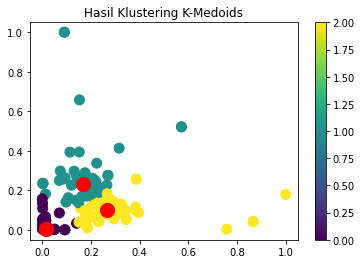

In [ ]:
#memvisualisasikan hasil kluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = driver.kluster, marker = 'o', alpha = 1, )

centers = kmedoids.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');

plt.title('Hasil Klustering K-Medoids')
plt.colorbar (output)

plt.show()

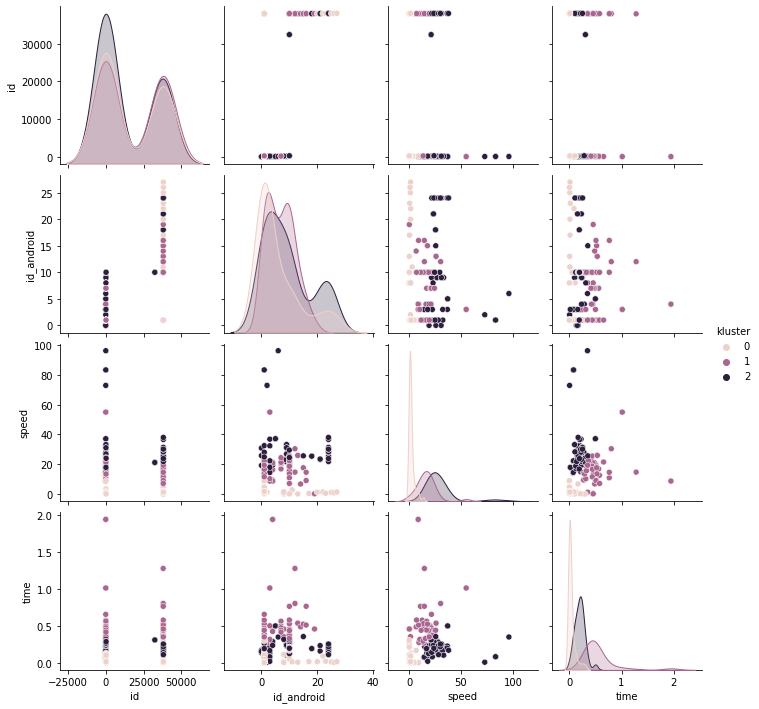

In [ ]:
sns.pairplot(driver, hue = 'kluster')